## Importing Required Libraries

These libraries are necessary for data manipulation, visualization, and statistical modeling.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Exploratory Data Analysis (EDA)

This section explores the dataset's structure, content, and variable distributions.

## Data Preparation Summary

This step involves loading the dataset, checking for missing or duplicate values, and understanding the basic structure.

### 1. Loading Data and data description

In [24]:
data = pd.read_csv("./data/data.csv")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   geo                       6240 non-null   object 
 1   date                      6240 non-null   object 
 2   tv_impression             6240 non-null   int64  
 3   radio_impression          6240 non-null   int64  
 4   print_impression          6240 non-null   int64  
 5   search_impression         6240 non-null   int64  
 6   social_impression         6240 non-null   int64  
 7   competitor_sales_control  6240 non-null   float64
 8   sentiment_score_control   6240 non-null   float64
 9   tv_spend                  6240 non-null   float64
 10  radio_spend               6240 non-null   float64
 11  print_spend               6240 non-null   float64
 12  search_spend              6240 non-null   float64
 13  social_spend              6240 non-null   float64
 14  populati

In [26]:
data.describe()

,tv_impression,radio_impression,print_impression,search_impression,social_impression,competitor_sales_control,sentiment_score_control,tv_spend,radio_spend,print_spend,search_spend,social_spend,population,sales
count,6.240000e+03,6.240000e+03,6.240000e+03,6.240000e+03,6.240000e+03,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000
mean,8.851635e+05,5.206055e+05,2.605050e+05,1.806810e+06,9.816780e+05,-0.044412,-0.033675,6490.659147,5019.278558,1935.793164,14080.185617,7649.147993,542418.832750,211330.038098
std,8.193451e+05,6.206231e+05,5.551842e+05,1.304818e+06,9.141768e+05,1.210164,1.175572,6008.031135,5983.571424,4125.531614,10168.239254,7123.184932,242839.719887,121605.908396
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.825634,-4.230392,0.000000,0.000000,0.000000,0.000000,0.000000,136670.940000,9742.282233
25%,2.536458e+05,0.000000e+00,0.000000e+00,8.083565e+05,2.675945e+05,-0.872736,-0.808085,1859.914025,0.000000,0.000000,6299.393250,2085.072625,335176.345000,114323.174425
50%,6.796705e+05,3.106525e+05,0.000000e+00,1.505379e+06,7.462475e+05,-0.050346,-0.036433,4983.835500,2995.072650,0.000000,11731.178500,5814.694600,560478.825000,193995.582650
75%,1.324174e+06,8.075525e+05,2.547340e+05,2.566118e+06,1.476708e+06,0.743633,0.739391,9709.803000,7785.800675,1892.909150,19997.351500,11506.376500,736033.810000,287918.213625
max,5.192032e+06,4.397540e+06,5.610156e+06,7.635147e+06,6.975542e+06,3.924682,4.320259,38071.730000,42397.700000,41688.645000,59499.484000,54352.810000,994048.940000,739823.338900


In [5]:
data.head()

,geo,date,tv_impression,radio_impression,print_impression,search_impression,social_impression,competitor_sales_control,sentiment_score_control,tv_spend,radio_spend,print_spend,search_spend,social_spend,population,sales
0,Geo0,1/25/21,280668,0,0,470611,108010,-1.338765,0.115581,2058.0608,0.00000,0.00000,3667.3965,841.6044,136670.94,39198.55690
1,Geo0,2/1/21,366206,182108,19825,527702,252506,0.893645,0.944224,2685.2874,1755.74540,147.31808,4112.2974,1967.5044,136670.94,41497.96063
2,Geo0,2/8/21,197565,230170,0,393618,184061,-0.284549,-1.290579,1448.6895,2219.12230,0.00000,3067.4023,1434.1870,136670.94,41579.08885
3,Geo0,2/15/21,140990,66643,0,326034,201729,-1.034740,-1.084514,1033.8406,642.52057,0.00000,2540.7310,1571.8545,136670.94,56492.86151
4,Geo0,2/22/21,399116,164991,0,381982,153973,-0.319276,-0.017503,2926.6072,1590.71640,0.00000,2976.7249,1199.7440,136670.94,71039.82718


### 2. Null values identification

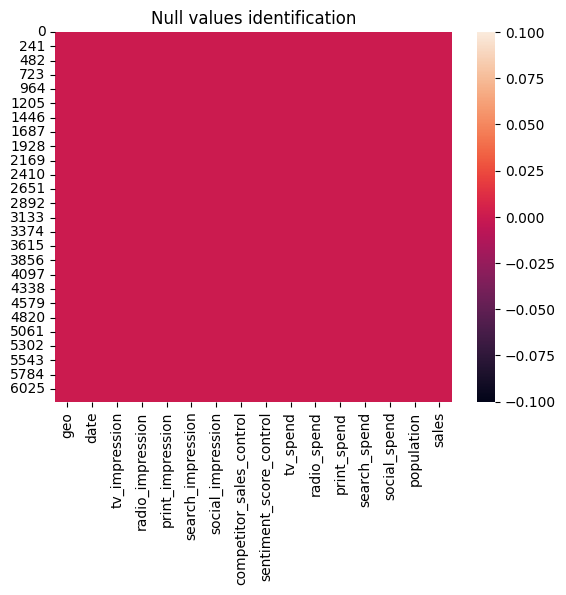

In [6]:
sns.heatmap(data.isnull())
plt.title("Null values identification")
plt.show()

In [7]:
print(f"Number of null values: {data.isnull().sum().sum()}")

Number of null values: 0


### 3. Duplicates detection

In [8]:
duplicates = data[data.duplicated()]
print(f"Number of duplicates records: {len(duplicates)}")

Number of duplicates records: 0


### 1. Pearson Correlation Heatmap

Visualizes linear relationships between numerical variables using Pearson's method.

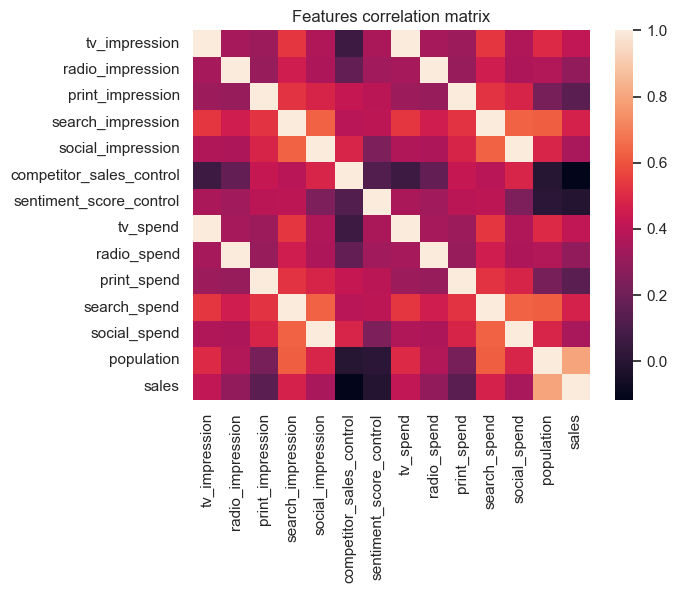

In [27]:
correlations = data.select_dtypes(include=['number']).corr()

sns.heatmap(correlations)
plt.title("Features correlation matrix")
plt.show()

### 2. Correlation with Target (Sales)

Highlights which variables are most strongly correlated (positively and negatively) with sales.

C:\Users\Rafa Rincon\AppData\Local\Temp\ipykernel_14840\1830579637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Rafa Rincon\AppData\Local\Temp\ipykernel_14840\1830579637.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


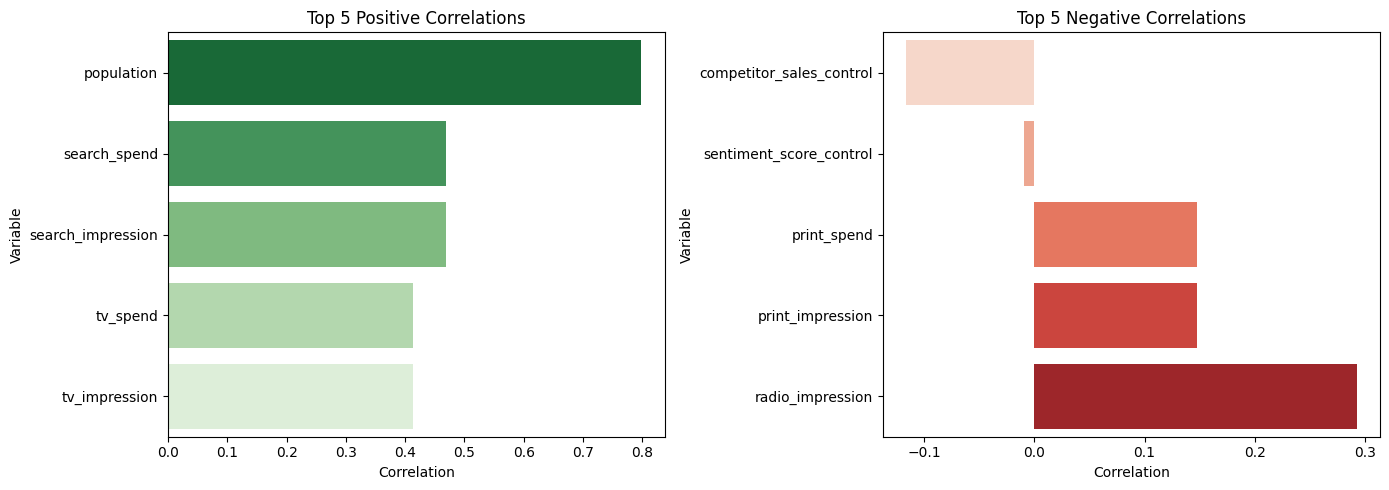

In [10]:
# Compute correlations with 'sales'
numeric_cols = data.select_dtypes(include=['number'])
correlations = numeric_cols.corr()['sales'].drop('sales')

# Top 5 positive and negative correlations
top_positive = correlations.sort_values(ascending=False).head(5).reset_index()
top_negative = correlations.sort_values(ascending=True).head(5).reset_index()

# Rename columns
top_positive.columns = ['variable', 'correlation']
top_negative.columns = ['variable', 'correlation']

# Create figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot positive correlations
sns.barplot(
    data=top_positive,
    x='correlation', y='variable',
    ax=axes[0], palette='Greens_r'
)
axes[0].set_title("Top 5 Positive Correlations")
axes[0].set_xlabel("Correlation")
axes[0].set_ylabel("Variable")

# Plot negative correlations
sns.barplot(
    data=top_negative,
    x='correlation', y='variable',
    ax=axes[1], palette='Reds'
)
axes[1].set_title("Top 5 Negative Correlations")
axes[1].set_xlabel("Correlation")
axes[1].set_ylabel("Variable")

plt.tight_layout()
plt.show()


## Feature Engineering

New features are derived from existing data to enhance model performance and capture relevant signals.

### 1. Geographic Feature Encoding

Converts the 'geo' categorical variable into binary (dummy) variables for use in regression models.

In [11]:
# Convert the 'geo' categorical variable into dummy/indicator variables (drop the first to avoid multicollinearity)
geo_dummies = pd.get_dummies(data['geo'], drop_first=True)

# Ensure all dummy variables are of integer type
geo_dummies = geo_dummies.astype(int)

# Append the dummy variables to the original dataset
data = pd.concat([data, geo_dummies], axis=1)

### 2. Temporal Feature Transformation

Extracts seasonality and calendar-related components from the date column.

In [12]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['weekofyear'] = data['date'].dt.isocalendar().week.astype(int)


#data['is_weekend'] = data['date'].dt.dayofweek >= 5
#data['is_weekend'] = data['is_weekend'].astype(int)
data['quarter'] = data['date'].dt.quarter
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

C:\Users\Rafa Rincon\AppData\Local\Temp\ipykernel_14840\1900084449.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


## Seasonality and Time-Series Structure

Analyzes temporal sales patterns, decomposing them into trend, seasonal, and irregular components.

### 1. Outlier Detection in Sales

Boxplots help identify extreme values or irregular fluctuations in the sales data.

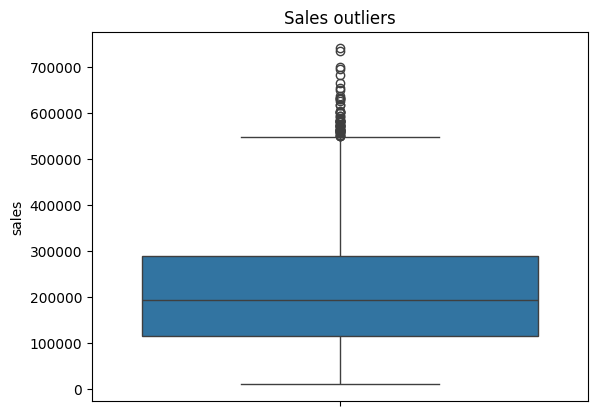

In [13]:
sns.boxplot(data["sales"])
plt.title("Sales outliers")
plt.show()

### 2. Time-Series Decomposition

Uses additive decomposition to separate sales into seasonal, trend, and residual components.

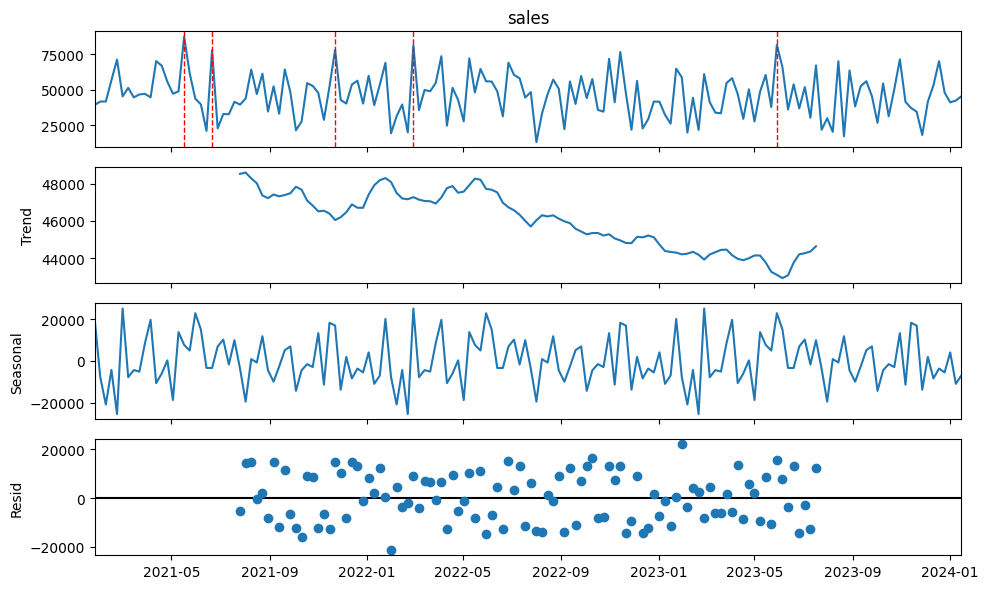

In [14]:
# Filter data by a specific geography and aggregate sales by date
geo_df = data[data['geo'] == 'Geo0'].groupby('date')['sales'].sum()
geo_df = geo_df.sort_index()

# Perform seasonal decomposition (weekly frequency, assuming 52 periods per year)
result = seasonal_decompose(geo_df, model='additive', period=52)

# Identify top 5 dates with the highest sales (sales peaks)
top_peaks = geo_df.sort_values(ascending=False).head(5).index

# Plot decomposition components and mark sales peaks with red lines
fig = result.plot()
fig.set_size_inches(10, 6)

# Add vertical red dashed lines on the observed component for peak dates
observed_ax = fig.axes[0]
for date in top_peaks:
    observed_ax.axvline(x=date, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


## Media Mix Modeling: Channel Effectiveness

This model evaluates how different marketing channels contribute to overall sales.

### 1. Adstock and Saturation Effects

Applies an adstock transformation to simulate delayed media effects, followed by log transformation for diminishing returns.

In [15]:
# Define a function to apply the adstock transformation
# This simulates the carryover effect of advertising over time using a decay factor
def apply_adstock(series, decay=0.5):
    result = []
    for i, val in enumerate(series):
        if i == 0:
            result.append(val)  # First value remains unchanged
        else:
            # Current value plus a portion of the previous value based on the decay factor
            result.append(val + decay * result[i - 1])
    return pd.Series(result, index=series.index)

# List of media spend channels to apply adstock to
spend_channels = ['tv_spend', 'radio_spend', 'print_spend', 'search_spend', 'social_spend']

# Set decay rate for adstock effect
decay = 0.5

# Apply adstock and log transformation (to model diminishing returns) for each channel
for channel in spend_channels:
    adstocked = apply_adstock(data[channel], decay)
    data[f'{channel}_transformed'] = np.log1p(adstocked)  # Log transformation for saturation effect


### 2. Regression Coefficient Interpretation

Estimates the marginal effect of each feature on sales using Ordinary Least Squares (OLS) regression.

In [16]:
features_adstock = [
    "tv_spend_transformed", "radio_spend_transformed", "print_spend_transformed",
    "search_spend_transformed", "social_spend_transformed",
    'competitor_sales_control', 'sentiment_score_control', 'population',
    'month_sin', 'month_cos'
]

# Add geographic dummy variables (geo_*) to the list of features
geo_features = geo_dummies.columns.tolist()
features_with_geo = features_adstock + geo_features


In [17]:
# Add a constant (intercept) term to the feature set
X_with_geo = sm.add_constant(data[features_with_geo])

# Define the target variable (sales)
y_with_geo = data['sales']

# Fit an Ordinary Least Squares (OLS) regression model using the selected features
model_with_geo = sm.OLS(y_with_geo, X_with_geo).fit()

# Display the summary of regression results
print(model_with_geo.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     295.2
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:45:35   Log-Likelihood:                -78201.
No. Observations:                6240   AIC:                         1.565e+05
Df Residuals:                    6191   BIC:                         1.568e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### 3. ROI and Marginal Contribution Analysis

Calculates Return on Investment (ROI) and average contribution to sales by media channel.

In [18]:
# Define the list of original media spend channels
spend_channels = ['tv_spend', 'radio_spend', 'print_spend', 'search_spend', 'social_spend']

# Retrieve model coefficients (from the geo-inclusive model or use model_adstock if geo is not included)
coeffs = model_with_geo.params

# Calculate contribution and ROI for each media channel
contrib_values = []
roi_values = []

for ch in spend_channels:
    ch_trans = f'{ch}_transformed'  # Transformed version of the spend variable
    coef = coeffs[ch_trans]  # Coefficient from the regression model
    avg_trans = data[ch_trans].mean()  # Average transformed spend
    avg_spend = data[ch].mean()  # Average actual spend

    # Contribution is the coefficient times the average transformed value
    contribution = coef * avg_trans

    # ROI is contribution divided by the average actual spend
    roi = contribution / avg_spend if avg_spend != 0 else None

    # Store results
    contrib_values.append(contribution)
    roi_values.append(roi)

# Create a DataFrame to summarize contributions and ROIs by channel
df_contrib_roi_geo = pd.DataFrame({
    'channel': spend_channels,
    'contribution': contrib_values,
    'roi': roi_values
})


In [ ]:
df_contrib_roi_geo 

,channel,contribution,roi
0,tv_spend,40426.675355,6.228439
1,radio_spend,22575.263459,4.497711
2,print_spend,10995.905744,5.680310
3,search_spend,72374.227808,5.140147
4,social_spend,27812.133260,3.635978


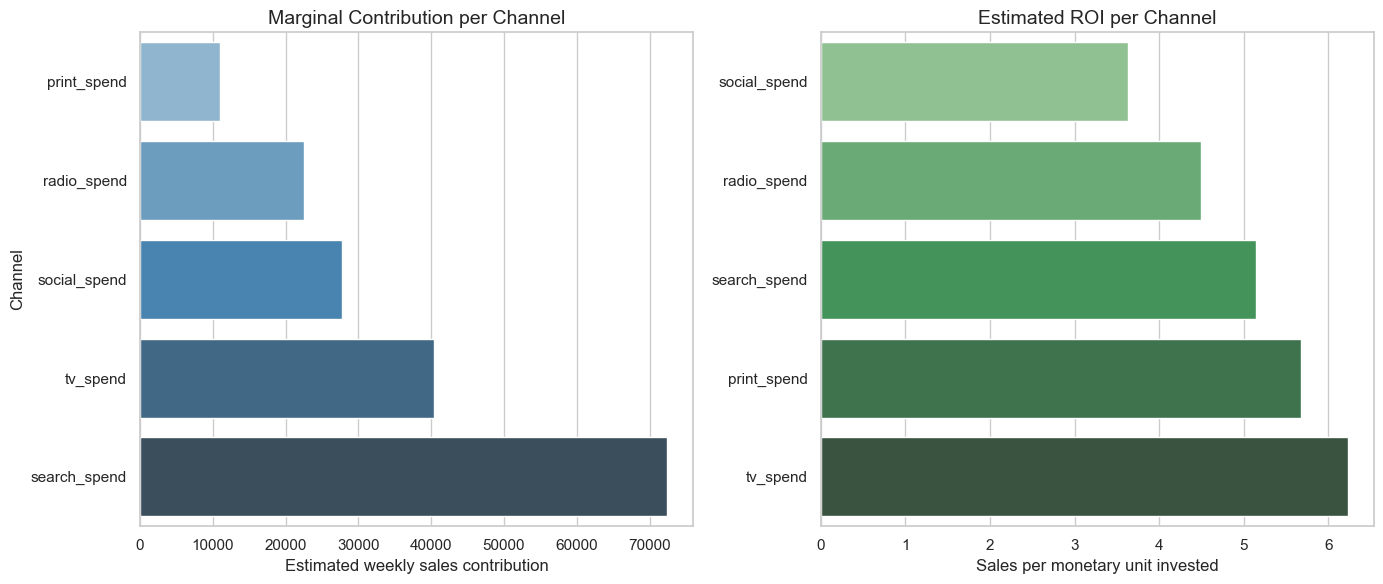

In [19]:
# Set visual style
sns.set(style="whitegrid")

# Create figure with two horizontal bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Contribution plot
sns.barplot(
    x="contribution", y="channel", hue="channel", legend=False,
    data =df_contrib_roi_geo.sort_values("contribution", ascending=True),
    palette="Blues_d", ax=axes[0]
)
axes[0].set_title("Marginal Contribution per Channel", fontsize=14)
axes[0].set_xlabel("Estimated weekly sales contribution")
axes[0].set_ylabel("Channel")

# ROI plot
sns.barplot(
    x="roi", y="channel", hue="channel", legend=False,
    data = df_contrib_roi_geo.sort_values("roi", ascending=True),
    palette="Greens_d", ax=axes[1]
)
axes[1].set_title("Estimated ROI per Channel", fontsize=14)
axes[1].set_xlabel("Sales per monetary unit invested")
axes[1].set_ylabel("")  # Hide redundant label

# Adjust layout for clarity
plt.tight_layout()
plt.show()

### 4. Regional and Temporal ROI Analysis

Examines how ROI varies across geographies and time periods to uncover channel performance patterns.

In [49]:
# Define the list of media spend channels
spend_channels = ['tv_spend', 'radio_spend', 'print_spend', 'search_spend', 'social_spend']

# Extract global model coefficients
coeffs = model_with_geo.params

# Initialize list to store ROI and contribution results by region and time
geo_time_results = []

# Group the data by geography, year, month, and quarter
for (geo, year, month, quarter), group in data.groupby(['geo', 'year', 'month', "quarter"]):
    for ch in spend_channels:
        ch_trans = f'{ch}_transformed'
        coef = coeffs.get(ch_trans, 0)  # Get coefficient; use 0 if not found

        avg_trans = group[ch_trans].mean()  # Mean transformed media spend for the group
        avg_spend = group[ch].mean()       # Mean actual media spend for the group

        contribution = coef * avg_trans  # Compute estimated contribution to sales
        roi = contribution / avg_spend if avg_spend != 0 else None  # Compute ROI

        # Store the result for this geo-time-channel combination
        geo_time_results.append({
            'geo': geo,
            'year': year,
            'month': month,
            "quarter": quarter,
            'channel': ch,
            'contribution': contribution,
            'roi': roi
        })

# Create a final DataFrame with the results
df_geo_month_roi = pd.DataFrame(geo_time_results)

# Export results to CSV (optional)
df_geo_month_roi.to_csv("./data/ROI_Contribution_geo_year.csv", index=False)

# Display the top results sorted by ROI in descending order
print(df_geo_month_roi.sort_values(by="roi", ascending=False).head())

        geo  year  month  quarter      channel  contribution          roi
7332   Geo9  2022     12        4  print_spend  10544.370508  2752.638300
752   Geo12  2021      3        1  print_spend   7042.527624  1362.467476
57     Geo0  2021     12        4  print_spend   7497.059152  1122.246918
4952  Geo32  2023      5        2  print_spend   3273.768886   896.540688
4452  Geo30  2021      3        1  print_spend   8517.333353   740.344313


## Model Evaluation

This section includes statistical validation of the regression model using residual diagnostics.

### 1. Residual Diagnostics

Uses the Ljung-Box and Breusch-Pagan tests to check for autocorrelation and heteroskedasticity in residuals.

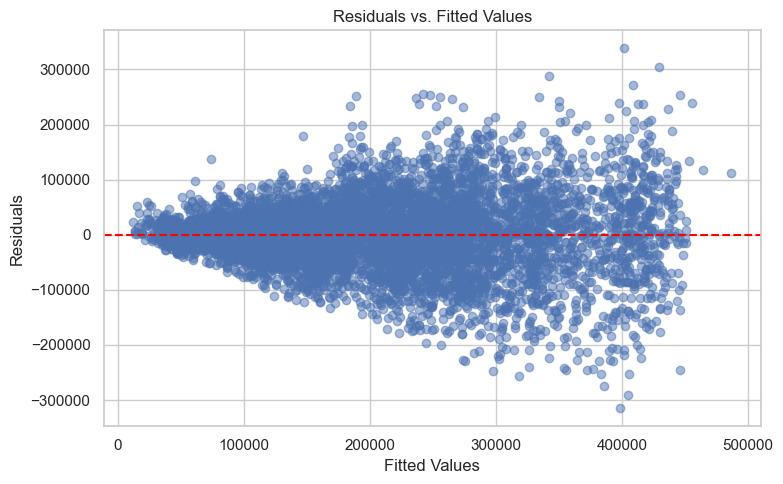

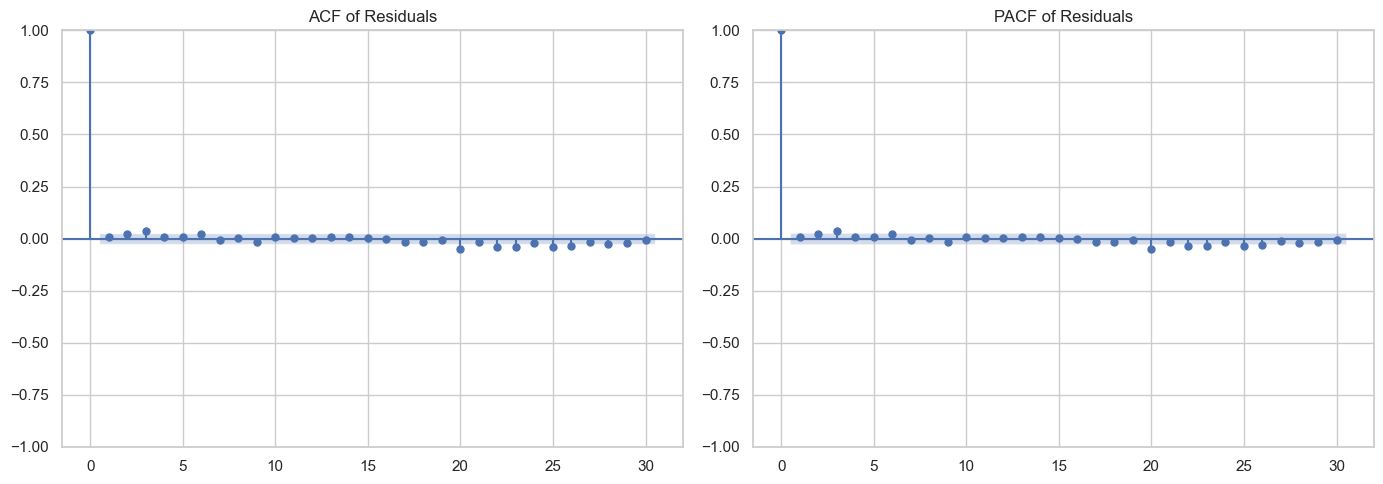

Ljung-Box test (lag=12):
      lb_stat  lb_pvalue
12  17.907369   0.118532

Breusch-Pagan test:
Test statistic: 1027.96
p-value: 0.0000
Interpretation: Heteroskedasticity present


In [20]:
# Extract model residuals and fitted (predicted) values
residuals = model_with_geo.resid
fitted = model_with_geo.fittedvalues

# Plot residuals vs. fitted values to visually assess homoscedasticity (constant variance)
plt.figure(figsize=(8, 5))
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Reference line at zero
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Plot Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) of residuals
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(residuals, lags=30, ax=ax[0])  # Autocorrelation plot
plot_pacf(residuals, lags=30, ax=ax[1])  # Partial autocorrelation plot
ax[0].set_title("ACF of Residuals")
ax[1].set_title("PACF of Residuals")
plt.tight_layout()
plt.show()

# Perform Ljung-Box test to check for autocorrelation in residuals
ljung_box = acorr_ljungbox(residuals, lags=[12], return_df=True)
print("Ljung-Box test (lag=12):")
print(ljung_box)

# Perform Breusch-Pagan test to detect heteroskedasticity (non-constant variance of residuals)
exog = model_with_geo.model.exog
bp_test = het_breuschpagan(residuals, exog)

# Output Breusch-Pagan test results
print("\nBreusch-Pagan test:")
print(f"Test statistic: {bp_test[0]:.2f}")
print(f"p-value: {bp_test[1]:.4f}")
print(f"Interpretation: {'No heteroskedasticity detected' if bp_test[1] > 0.05 else 'Heteroskedasticity present'}")
